INSERT PRELIMINARY INFO HERE

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read and make a copy of the file

dd_orig = pd.read_csv("doordash_order_history.csv", encoding= 'ANSI')
dd = dd_orig.copy()

In [3]:
# taking a look into the data

dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Number  167 non-null    float64
 1   Date          167 non-null    object 
 2   Time          167 non-null    object 
 3   Restaurant    167 non-null    object 
 4   Cuisine       167 non-null    object 
 5   Items         167 non-null    float64
 6   Cost          167 non-null    object 
dtypes: float64(2), object(5)
memory usage: 6.0+ KB


INSERT ANALYSIS HERE - plans to clean: cleaning Cost column, combining Time and Date column and  formatting to datetime


In [4]:
# cleaning the Cost column, removing symbols and formating column to a float

dd['Cost'] = dd['Cost'].str.replace('$','')
dd['Cost'] = dd['Cost'].astype('float')
dd.info()
dd['Cost']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Number  167 non-null    float64
 1   Date          167 non-null    object 
 2   Time          167 non-null    object 
 3   Restaurant    167 non-null    object 
 4   Cuisine       167 non-null    object 
 5   Items         167 non-null    float64
 6   Cost          167 non-null    float64
dtypes: float64(3), object(4)
memory usage: 6.6+ KB


0      30.71
1      50.03
2      47.41
3      27.93
4      24.15
       ...  
163    33.01
164    44.25
165    41.01
166    29.88
167      NaN
Name: Cost, Length: 168, dtype: float64

In [5]:
# combining date and time columns (strings) into one column with datetime format

dd['Date Time'] = dd['Date'] + ' ' + dd['Time']
dd['Date Time'] = pd.to_datetime(dd['Date Time'])
dd.info()
dd['Date Time']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Number  167 non-null    float64       
 1   Date          167 non-null    object        
 2   Time          167 non-null    object        
 3   Restaurant    167 non-null    object        
 4   Cuisine       167 non-null    object        
 5   Items         167 non-null    float64       
 6   Cost          167 non-null    float64       
 7   Date Time     167 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 7.9+ KB


0     2020-10-16 14:41:00
1     2020-10-15 14:47:00
2     2020-10-14 20:03:00
3     2020-10-10 14:20:00
4     2020-10-08 13:02:00
              ...        
163   2019-01-19 16:26:00
164   2019-01-09 20:10:00
165   2019-01-05 19:28:00
166   2018-12-23 18:42:00
167                   NaT
Name: Date Time, Length: 168, dtype: datetime64[ns]

In [6]:
# Removing the separated Date & Time columns

dd = dd.drop('Date', axis=1)
dd = dd.drop('Time', axis=1)
dd

,Order Number,Restaurant,Cuisine,Items,Cost,Date Time
0,167.0,Sycamore Grill,American,2.0,30.71,2020-10-16 14:41:00
1,166.0,Moish & Itzy's Deli,Diner,4.0,50.03,2020-10-15 14:47:00
2,165.0,La Stalla,Italian,2.0,47.41,2020-10-14 20:03:00
3,164.0,Lovebird,Chicken,3.0,27.93,2020-10-10 14:20:00
4,163.0,Burritos,Mexican,2.0,24.15,2020-10-08 13:02:00
...,...,...,...,...,...,...
163,4.0,Sycamore Grill,American,2.0,33.01,2019-01-19 16:26:00
164,3.0,Friends Bar & Grille,Tavern,2.0,44.25,2019-01-09 20:10:00
165,2.0,De Lorenzo's Tomato Pies,Pizza,1.0,41.01,2019-01-05 19:28:00
166,1.0,De Lorenzo's Tomato Pies,Pizza,1.0,29.88,2018-12-23 18:42:00


In [7]:
# moving Date Time column to the front after the Order Number

new_col = 'Date Time'
new_dt = dd.pop('Date Time')
dd.insert(1, new_col, new_dt)
dd

,Order Number,Date Time,Restaurant,Cuisine,Items,Cost
0,167.0,2020-10-16 14:41:00,Sycamore Grill,American,2.0,30.71
1,166.0,2020-10-15 14:47:00,Moish & Itzy's Deli,Diner,4.0,50.03
2,165.0,2020-10-14 20:03:00,La Stalla,Italian,2.0,47.41
3,164.0,2020-10-10 14:20:00,Lovebird,Chicken,3.0,27.93
4,163.0,2020-10-08 13:02:00,Burritos,Mexican,2.0,24.15
...,...,...,...,...,...,...
163,4.0,2019-01-19 16:26:00,Sycamore Grill,American,2.0,33.01
164,3.0,2019-01-09 20:10:00,Friends Bar & Grille,Tavern,2.0,44.25
165,2.0,2019-01-05 19:28:00,De Lorenzo's Tomato Pies,Pizza,1.0,41.01
166,1.0,2018-12-23 18:42:00,De Lorenzo's Tomato Pies,Pizza,1.0,29.88


In [8]:
# checking if there are any null values

dd.isnull().sum()

Order Number    1
Date Time       1
Restaurant      1
Cuisine         1
Items           1
Cost            1
dtype: int64

In [9]:
# double checking total null values across all columns
dd.isna()

,Order Number,Date Time,Restaurant,Cuisine,Items,Cost
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
163,False,False,False,False,False,False
164,False,False,False,False,False,False
165,False,False,False,False,False,False
166,False,False,False,False,False,False


In [10]:
# removing row 167 to eliminate any null / na values

dd = dd.drop(167, axis=0)
dd

,Order Number,Date Time,Restaurant,Cuisine,Items,Cost
0,167.0,2020-10-16 14:41:00,Sycamore Grill,American,2.0,30.71
1,166.0,2020-10-15 14:47:00,Moish & Itzy's Deli,Diner,4.0,50.03
2,165.0,2020-10-14 20:03:00,La Stalla,Italian,2.0,47.41
3,164.0,2020-10-10 14:20:00,Lovebird,Chicken,3.0,27.93
4,163.0,2020-10-08 13:02:00,Burritos,Mexican,2.0,24.15
...,...,...,...,...,...,...
162,5.0,2019-02-28 19:38:00,59 Almshouse,American,3.0,48.52
163,4.0,2019-01-19 16:26:00,Sycamore Grill,American,2.0,33.01
164,3.0,2019-01-09 20:10:00,Friends Bar & Grille,Tavern,2.0,44.25
165,2.0,2019-01-05 19:28:00,De Lorenzo's Tomato Pies,Pizza,1.0,41.01


INSERT ANALYSIS HERE - individual column examinations, explain plans to add any additional columns 

In [11]:
# examining the numerical columns Items and Cost
dd['Items']

0      2.0
1      4.0
2      2.0
3      3.0
4      2.0
      ... 
162    3.0
163    2.0
164    2.0
165    1.0
166    1.0
Name: Items, Length: 167, dtype: float64

In [12]:
dd['Cost']

0      30.71
1      50.03
2      47.41
3      27.93
4      24.15
       ...  
162    48.52
163    33.01
164    44.25
165    41.01
166    29.88
Name: Cost, Length: 167, dtype: float64

In [13]:
# adding a column for avg cost per item for each order (total cost / item number)

dd['CPI'] = dd['Cost'] / dd['Items']
dd['CPI']

0      15.355000
1      12.507500
2      23.705000
3       9.310000
4      12.075000
         ...    
162    16.173333
163    16.505000
164    22.125000
165    41.010000
166    29.880000
Name: CPI, Length: 167, dtype: float64

In [14]:
# examining the CPI column, we only need two decimals so we need to round to
# nearest penny

dd['CPI'] = dd['CPI'].round(decimals= 2)
dd['CPI']

0      15.36
1      12.51
2      23.70
3       9.31
4      12.08
       ...  
162    16.17
163    16.50
164    22.12
165    41.01
166    29.88
Name: CPI, Length: 167, dtype: float64

In [15]:
# examining the Restaurant column

dd['Restaurant'].describe()

count                                167
unique                                47
top       Mt Fuji Hibachi & Asian Bistro
freq                                  19
Name: Restaurant, dtype: object

In [16]:
# examining the Cuisine column

dd['Cuisine'].describe()

count          167
unique          20
top       Japanese
freq            37
Name: Cuisine, dtype: object

INSERT ANALYSIS HERE - it looks like there are 47 unique restaurants, totalling 20 different types of cuisine that I've ordered from through DD. The most ordered from restaurant is Mt Fuji (not surprising to me!), a local sushi joint, on 19 separate occasions. Of the 167 orders, I've ordered Japanese 37 times which == 22% of all orders.

In [17]:
# We should probably eliminate the order number column since there is no significant
# value in having this column in our table. If we ever need a locator, we can identify
# with a date / time. We will also rename our columns for optimal code quality

dd = dd.drop(columns = 'Order Number')
dd

,Date Time,Restaurant,Cuisine,Items,Cost,CPI
0,2020-10-16 14:41:00,Sycamore Grill,American,2.0,30.71,15.36
1,2020-10-15 14:47:00,Moish & Itzy's Deli,Diner,4.0,50.03,12.51
2,2020-10-14 20:03:00,La Stalla,Italian,2.0,47.41,23.70
3,2020-10-10 14:20:00,Lovebird,Chicken,3.0,27.93,9.31
4,2020-10-08 13:02:00,Burritos,Mexican,2.0,24.15,12.08
...,...,...,...,...,...,...
162,2019-02-28 19:38:00,59 Almshouse,American,3.0,48.52,16.17
163,2019-01-19 16:26:00,Sycamore Grill,American,2.0,33.01,16.50
164,2019-01-09 20:10:00,Friends Bar & Grille,Tavern,2.0,44.25,22.12
165,2019-01-05 19:28:00,De Lorenzo's Tomato Pies,Pizza,1.0,41.01,41.01


In [18]:
# reformatting all columns to snake_case

dd.columns = dd.columns.str.lower()
dd.columns = dd.columns.str.replace(' ', '_')
dd.columns

Index(['date_time', 'restaurant', 'cuisine', 'items', 'cost', 'cpi'], dtype='object')

In [19]:
# adding a day name column to the dataframe

dd['day'] = dd['date_time'].dt.day_name()
dd

,date_time,restaurant,cuisine,items,cost,cpi,day
0,2020-10-16 14:41:00,Sycamore Grill,American,2.0,30.71,15.36,Friday
1,2020-10-15 14:47:00,Moish & Itzy's Deli,Diner,4.0,50.03,12.51,Thursday
2,2020-10-14 20:03:00,La Stalla,Italian,2.0,47.41,23.70,Wednesday
3,2020-10-10 14:20:00,Lovebird,Chicken,3.0,27.93,9.31,Saturday
4,2020-10-08 13:02:00,Burritos,Mexican,2.0,24.15,12.08,Thursday
...,...,...,...,...,...,...,...
162,2019-02-28 19:38:00,59 Almshouse,American,3.0,48.52,16.17,Thursday
163,2019-01-19 16:26:00,Sycamore Grill,American,2.0,33.01,16.50,Saturday
164,2019-01-09 20:10:00,Friends Bar & Grille,Tavern,2.0,44.25,22.12,Wednesday
165,2019-01-05 19:28:00,De Lorenzo's Tomato Pies,Pizza,1.0,41.01,41.01,Saturday


In [20]:
# moving the Day column to the front of our dataframe

new_col = 'day'
day = dd.pop('day')
dd.insert(1, new_col, day)
dd.head()

,date_time,day,restaurant,cuisine,items,cost,cpi
0,2020-10-16 14:41:00,Friday,Sycamore Grill,American,2.0,30.71,15.36
1,2020-10-15 14:47:00,Thursday,Moish & Itzy's Deli,Diner,4.0,50.03,12.51
2,2020-10-14 20:03:00,Wednesday,La Stalla,Italian,2.0,47.41,23.70
3,2020-10-10 14:20:00,Saturday,Lovebird,Chicken,3.0,27.93,9.31
4,2020-10-08 13:02:00,Thursday,Burritos,Mexican,2.0,24.15,12.08


INSERT ANALYSIS HERE - finalized the data cleaning, any potential observations from data so far, where to go next

In [21]:
# looking at the top 10 restaurants ordered from

top_rest = dd['restaurant'].value_counts()
top_rest.head(10)

Mt Fuji Hibachi & Asian Bistro    19
La Stalla                         15
Osaka Sushi Japanese              14
De Lorenzo's Tomato Pies          13
Piccolo Trattoria                 12
Burritos                          12
Canal Street Grille                9
The Turning Point                  8
Moish & Itzy's Deli                7
Villa Rosa Italian Restaurant      4
Name: restaurant, dtype: int64

In [22]:
# looking at the top 10 cuisines ordered from

top_cuisine = dd['cuisine'].value_counts()
top_cuisine.head(10)

Japanese    37
Italian     35
Diner       18
Pizza       18
Mexican     12
American    11
Greek       10
Tavern       9
Café         4
Seafood      2
Name: cuisine, dtype: int64

INSERT ANALYSIS HERE - looking for any outliers, remove or not to remove? visualization charts/graphs are below with descriptions. build a story behind the ordering trends.

In [59]:
# Curious to see if there are any days where I ordered more than once from DoorDash?

dd['date'] = dd['date_time'].dt.date
print(dd['date'].nunique())
print(dd['date'].count())

157
167


In [81]:
# examining the ten days where I ordered more than one time from DoorDash
seen = {}
dupes = []

for x in dd['date']:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1

dupes

# i literally ordered for lunch and dinner for two days straight! *slaps my own hand*

[datetime.date(2020, 9, 11),
 datetime.date(2020, 9, 10),
 datetime.date(2020, 9, 5),
 datetime.date(2020, 8, 28),
 datetime.date(2020, 8, 5),
 datetime.date(2020, 6, 30),
 datetime.date(2020, 6, 22),
 datetime.date(2019, 12, 12),
 datetime.date(2019, 6, 17),
 datetime.date(2019, 4, 19)]

In [85]:
# On second thought lets re-add the separate 'date' and 'time' columns 
# to our dataframe for some further analysis & visualization

dd['date'] = dd['date_time'].dt.date
dd['time'] = dd['date_time'].dt.strftime('%H:%M')

dd.head()

# we can keep these at the end of the columns for now

,date_time,day,restaurant,cuisine,items,cost,cpi,date,time
0,2020-10-16 14:41:00,Friday,Sycamore Grill,American,2.0,30.71,15.36,2020-10-16,14:41
1,2020-10-15 14:47:00,Thursday,Moish & Itzy's Deli,Diner,4.0,50.03,12.51,2020-10-15,14:47
2,2020-10-14 20:03:00,Wednesday,La Stalla,Italian,2.0,47.41,23.70,2020-10-14,20:03
3,2020-10-10 14:20:00,Saturday,Lovebird,Chicken,3.0,27.93,9.31,2020-10-10,14:20
4,2020-10-08 13:02:00,Thursday,Burritos,Mexican,2.0,24.15,12.08,2020-10-08,13:02


INSERT ANALYSIS HERE - next looking at visualization techniques to determine outliers, correlations, and further insights

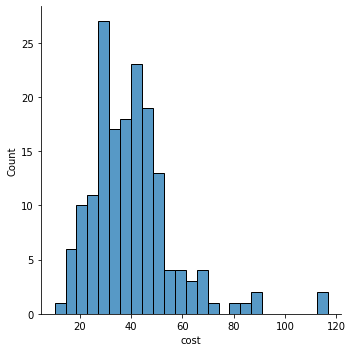

In [112]:
# Outlier Determination - Cost Outliers
sns.displot(dd['cost'], bins=25)

<AxesSubplot:xlabel='cost', ylabel='Density'>

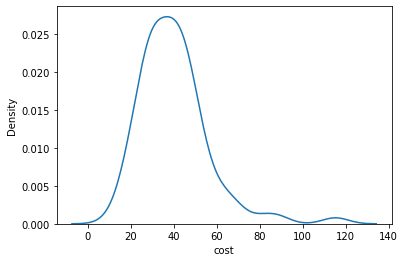

In [111]:
# KDE Plot shows potential outliers when total cost per order above $100 
sns.kdeplot(dd['cost'])

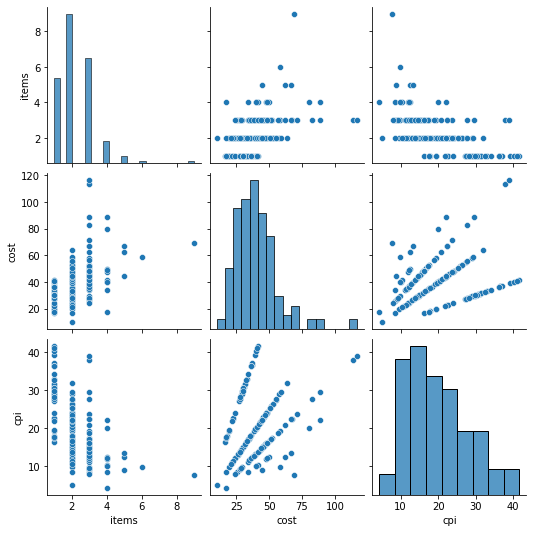

In [117]:
# visualizing some overarching themes between numerical data

sns.pairplot(dd, palette='Blues') 